In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import h5py

# Get elemental map from txt file

In [2]:
# here we focus on element Ca

In [3]:
fpath_ca = 'output_txt_scan2D_48816/detsum_Ca_K_48816.txt'

In [4]:
d_ca = np.loadtxt(fpath_ca)

In [6]:
# path for ion chamber
fpath_ic = 'output_txt_scan2D_48816/sclr1_ch4_48816.txt'

In [7]:
d_ic = np.loadtxt(fpath_ic)

<IPython.core.display.Javascript object>


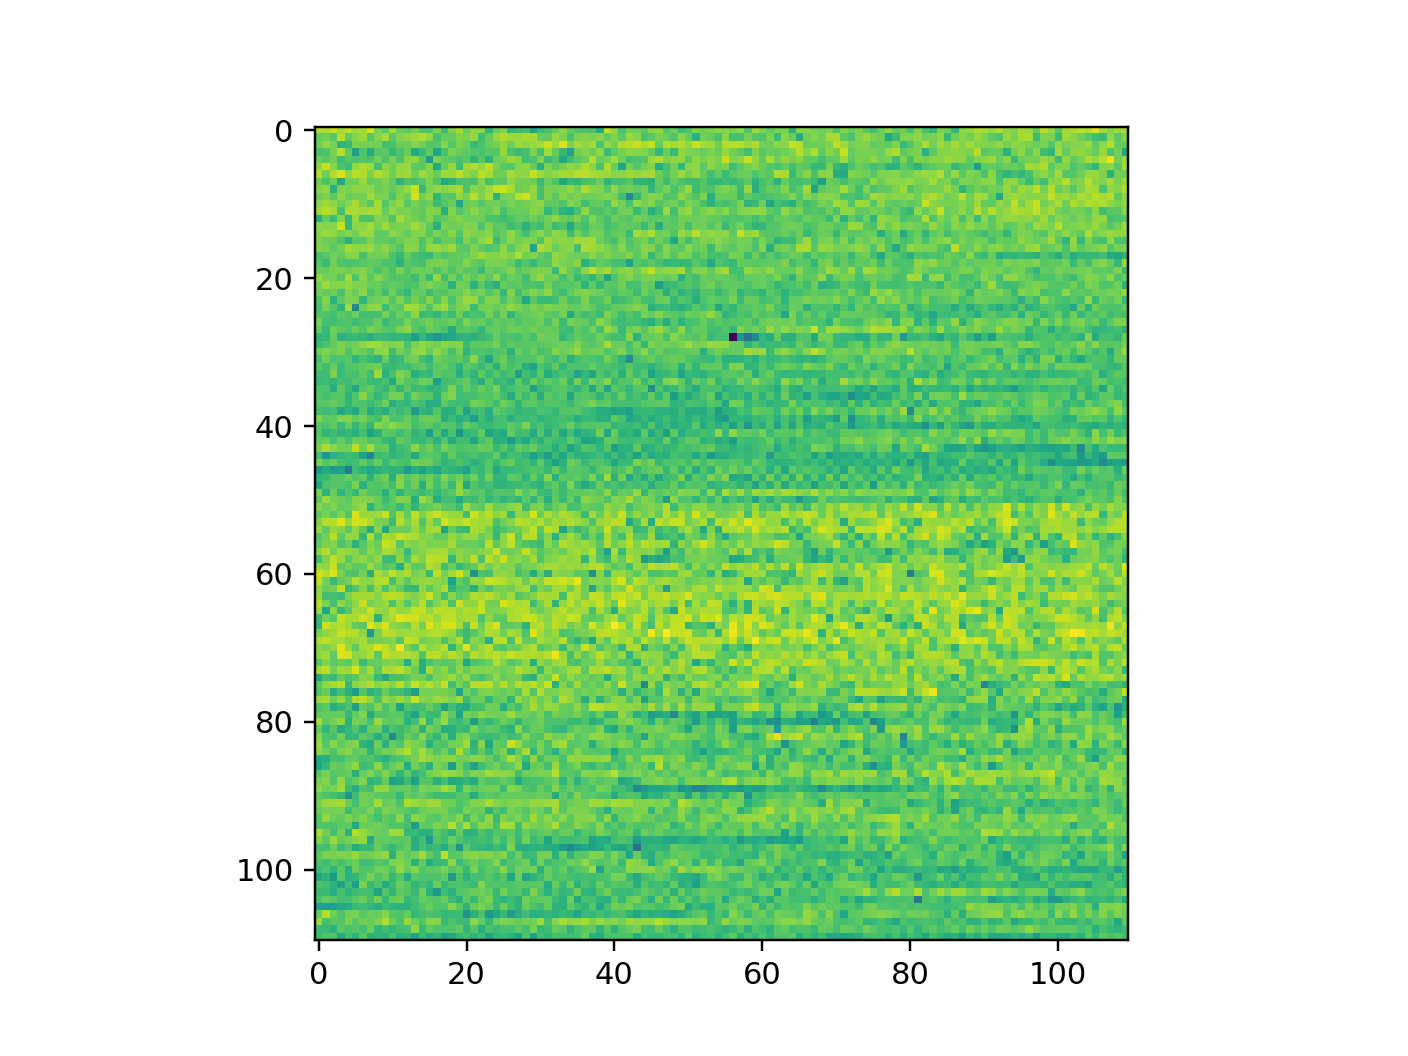

In [8]:
# plot ic map
fig, ax = plt.subplots()
ax.imshow(d_ic)

In [9]:
# normalized to ic
d_ca_norm = d_ca / d_ic

<IPython.core.display.Javascript object>


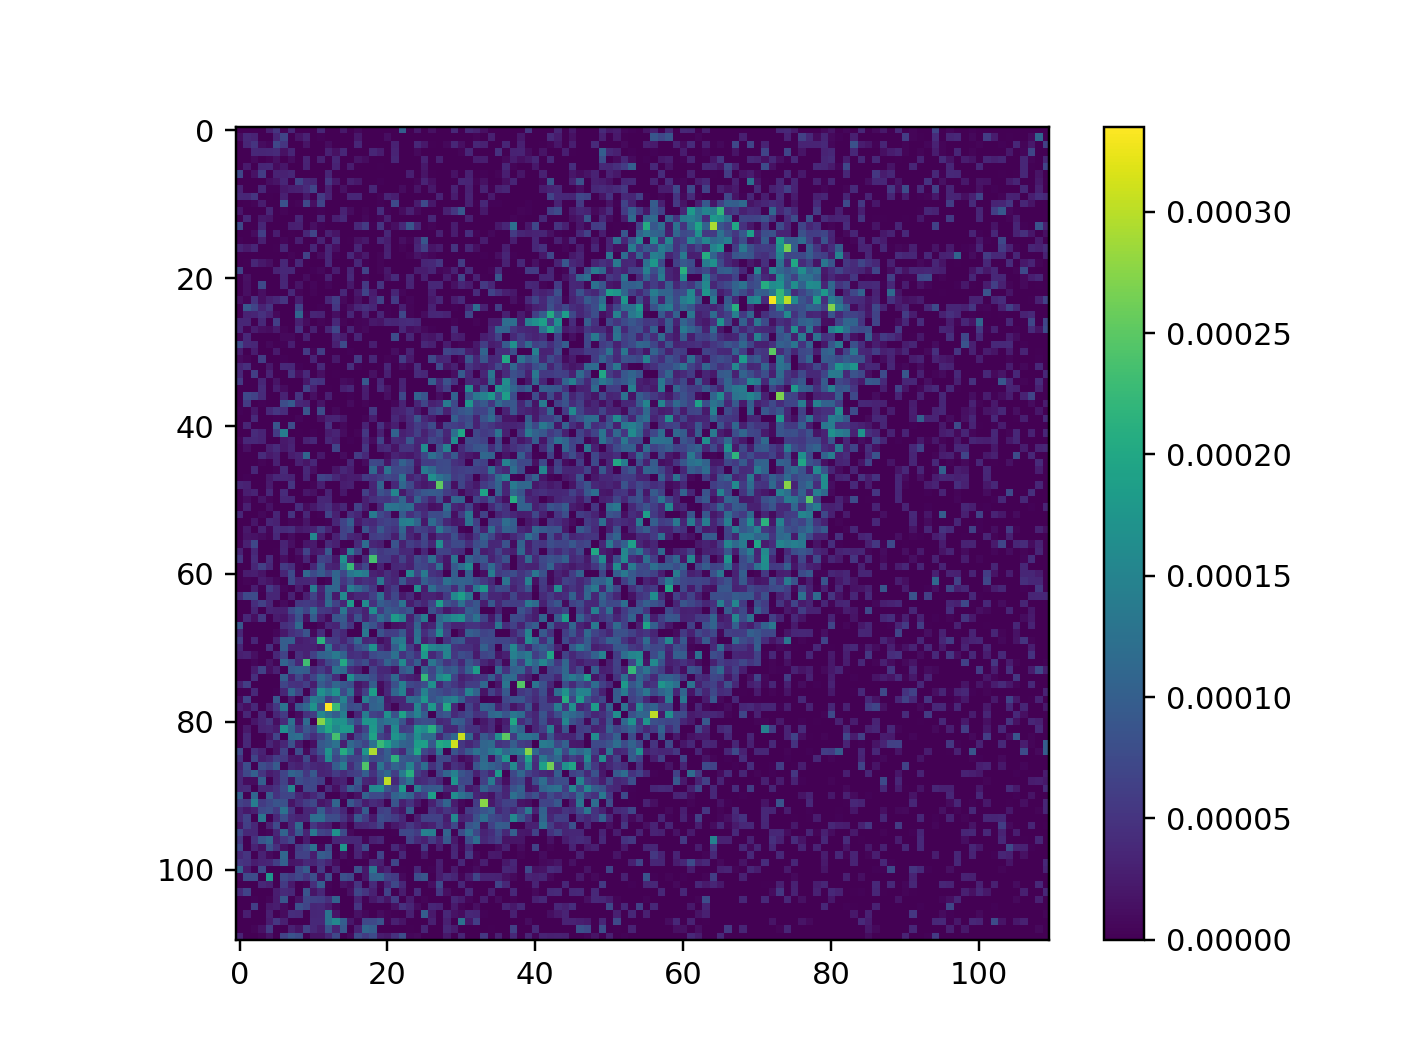

In [10]:
# normalize to ic and plot
fig, ax = plt.subplots()
im = ax.imshow(d_ca_norm)
fig.colorbar(im)

# Get elemental map from reference sample

In [11]:
# get elemental map from reference sample, also focus on Ca
fpath_ref_ca = 'output_txt_scan2D_48706/detsum_Ca_K_48706.txt'

# ion chamber value for reference
fpath_ref_ic = 'output_txt_scan2D_48706/sclr1_ch4_48706.txt'

In [12]:
ca_ref = np.loadtxt(fpath_ref_ca)
ic_ref = np.loadtxt(fpath_ref_ic)

In [13]:
# normalize to ic
ca_ref_norm = ca_ref / ic_ref

<IPython.core.display.Javascript object>


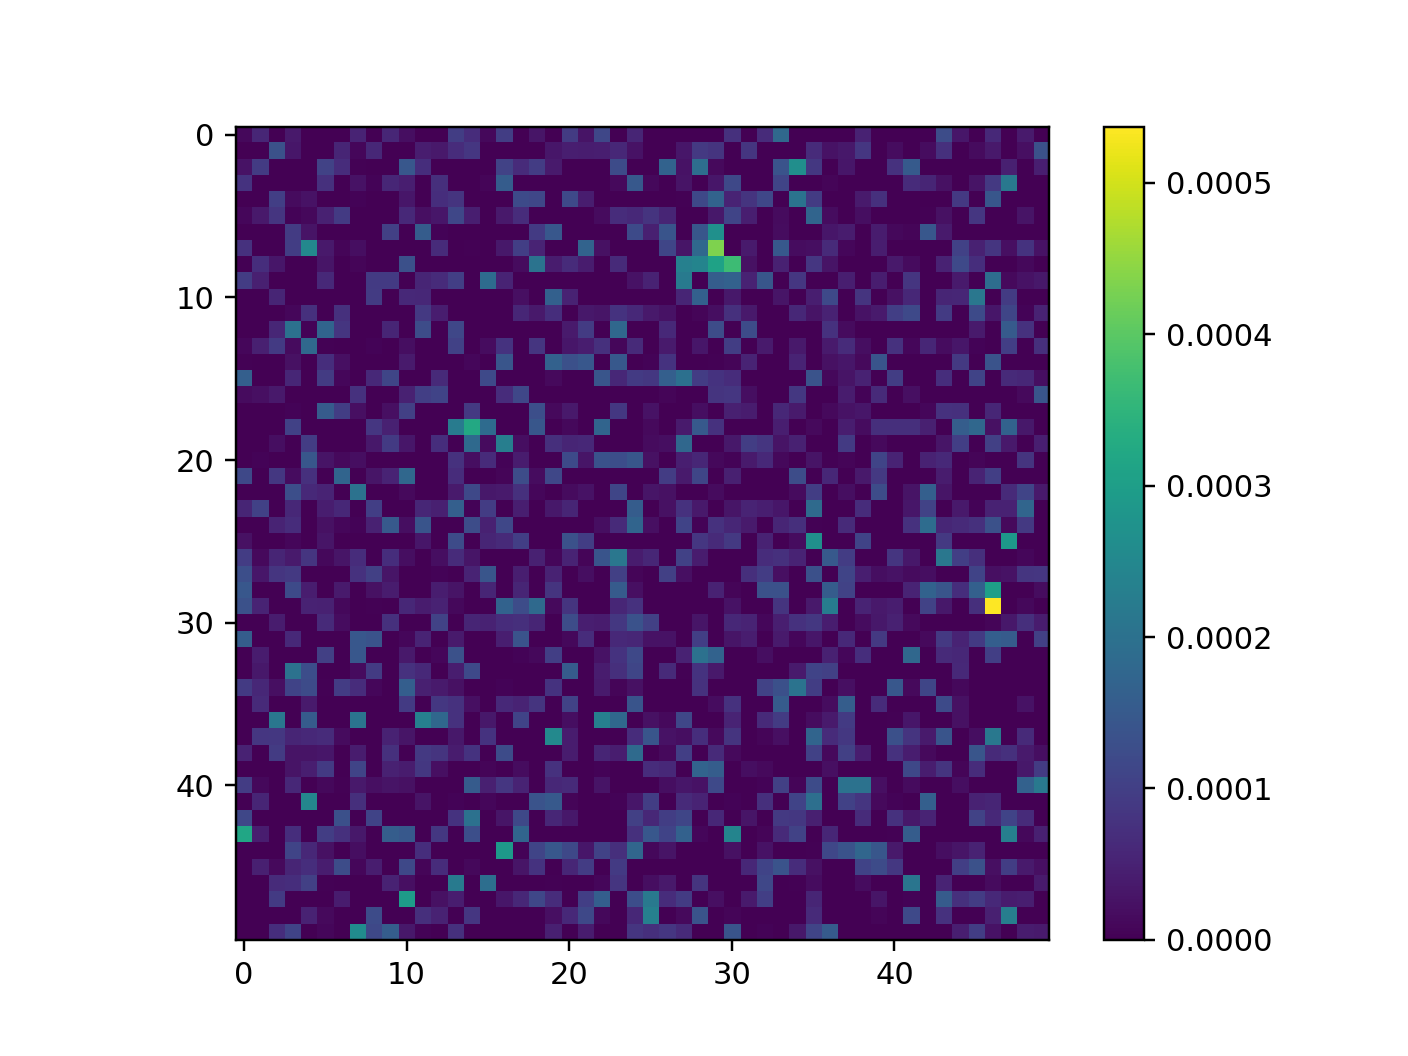

In [14]:
# plot of reference sample
fig, ax = plt.subplots()
im = ax.imshow(ca_ref_norm)
fig.colorbar(im)

In [15]:
# get mean
ca_ref_mean = np.mean(ca_ref_norm)

In [16]:
ca_ref_mean

3.8229401154059037e-05

# Calculate concentration

In [18]:
# normalize to reference sample to get concentration
concen_val = 16.6 # ug/cm2  for Ca
ca_concen = d_ca_norm / ca_ref_mean * concen_val

In [19]:
np.mean(ca_concen)

15.128551099855615

<IPython.core.display.Javascript object>


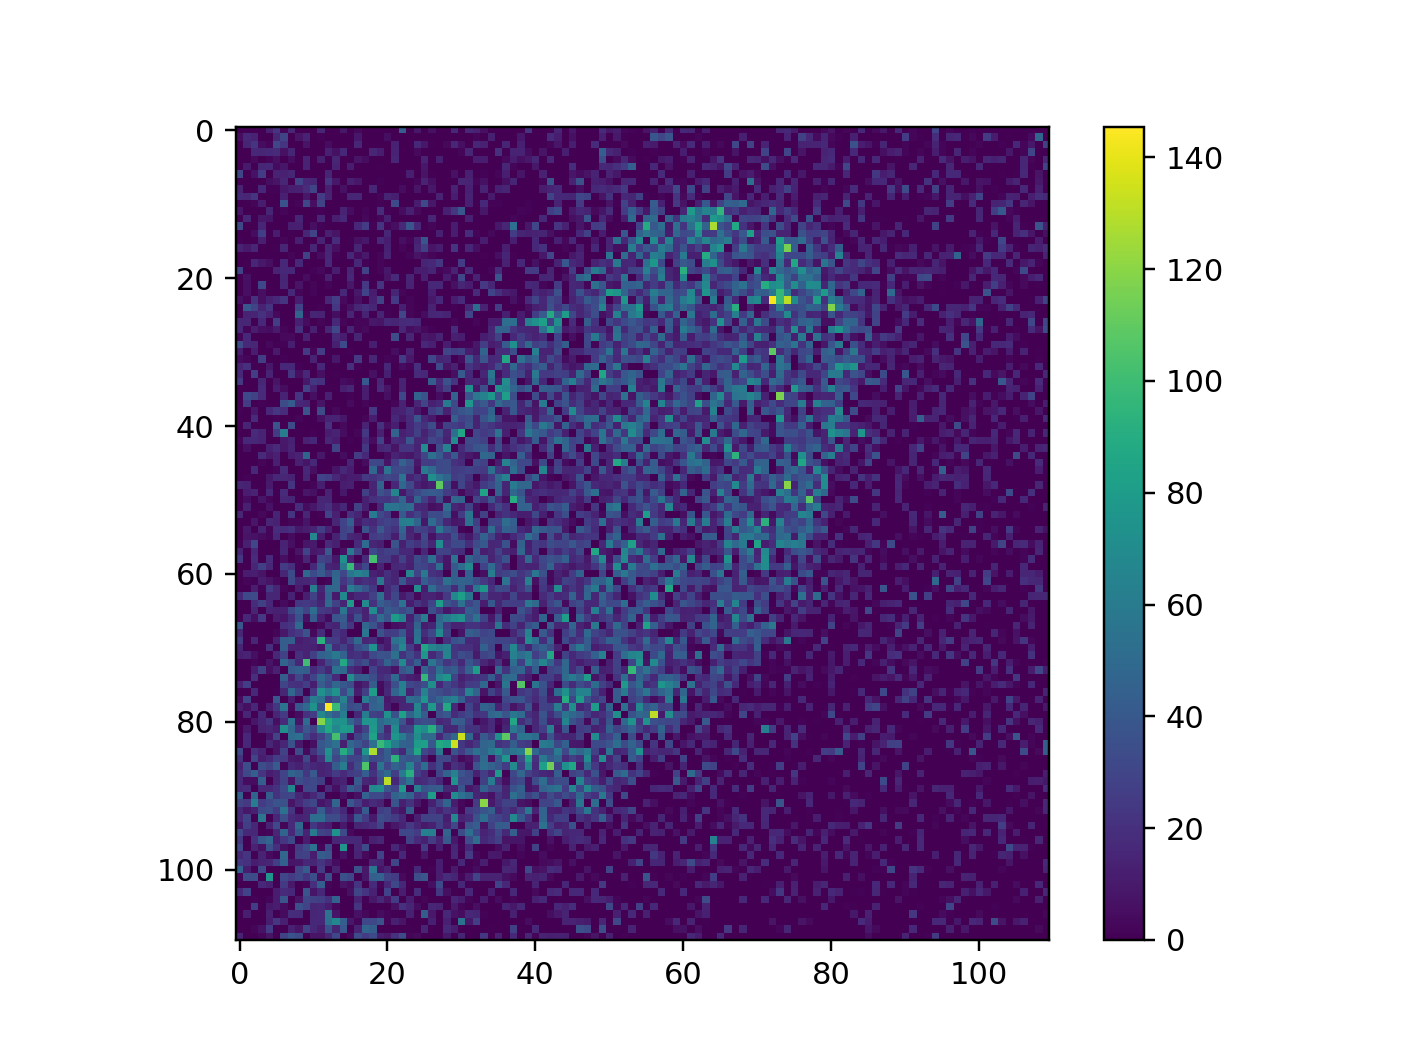

In [20]:
# plot of sample concentration
fig, ax = plt.subplots()
im = ax.imshow(ca_concen)
fig.colorbar(im)

# We can also repeat the same process by using h5 file instead of txt file. This is probably much easier, as all the data can be saved to dictionary.

# Get elemental map from h5 file

In [21]:
fname = 'scan2D_48816.h5'
with h5py.File(fname, 'r') as f:
    d = f['xrfmap/detsum/counts'][:]
    fit_v = f['xrfmap/detsum/xrf_fit'][:]
    fit_name = f['xrfmap/detsum/xrf_fit_name'][:]
    scaler_v = f['xrfmap/scalers/val'][:]
    scaler_name = f['xrfmap/scalers/name'][:]

In [22]:
fit_name = [v.decode() for v in fit_name]
scaler_name = [v.decode() for v in scaler_name]

In [23]:
d_fit = {}
for i, v in enumerate(fit_name):
    d_fit[str(v)] = fit_v[i, : ,:]
    
d_scaler = {}
for i, v in enumerate(scaler_name):
    d_scaler[str(v)] = scaler_v[: ,:, i]

In [24]:
# dictionary

d_fit.keys(), d_scaler.keys()

(dict_keys(['W_L', 'Si_K', 'Mn_K', 'Cr_K', 'Ga_K', 'Br_L', 'Co_K', 'Ni_K', 'Cu_K', 'Mg_K', 'Ce_L', 'Ca_K', 'P_K', 'Fe_K', 'compton', 'elastic', 'Pt_L', 'Ar_K', 'K_K', 'Ti_K', 'Er_L', 'snip_bkg', 'Zn_K', 'Na_K', 'r2_adjust', 'Al_K', 'S_K', 'Cl_K', 'V_K', 'Au_L']),
 dict_keys(['sclr1_ch2', 'sclr1_ch3', 'sclr1_ch4', 'sclr1_ch5', 'sclr1_ch6', 'sclr1_ch7', 'sclr1_ch8']))

<IPython.core.display.Javascript object>


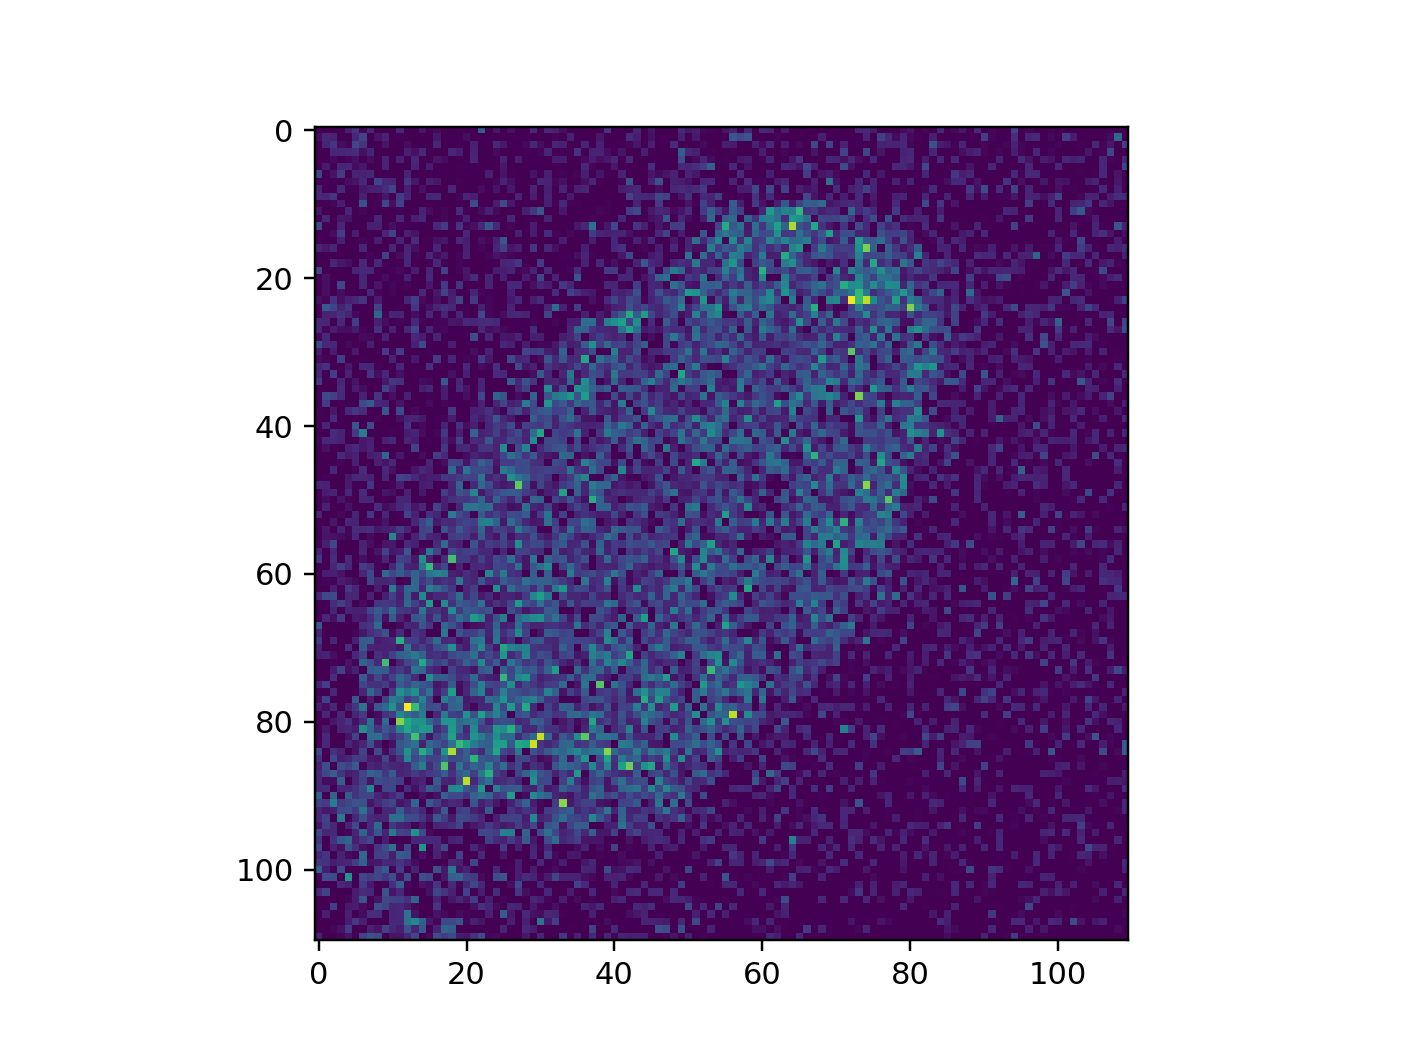

In [25]:
# plot normalized data
fig, ax = plt.subplots()
ax.imshow(d_fit['Ca_K']/d_scaler['sclr1_ch4'])